,DATE_OBS,TMPMAX,TMPMIN,TMPMN,PRECIP
DATE_OBS,,,,,
1959-01-01,1959-01-01,-4.1,-8.7,-7.5,0.2
1959-01-02,1959-01-02,2.7,-6.0,1.1,4.9
1959-01-03,1959-01-03,1.8,-2.5,-0.1,0.0
1959-01-04,1959-01-04,-0.9,-4.5,-2.0,0.5
1959-01-05,1959-01-05,2.4,-1.1,0.9,2.1


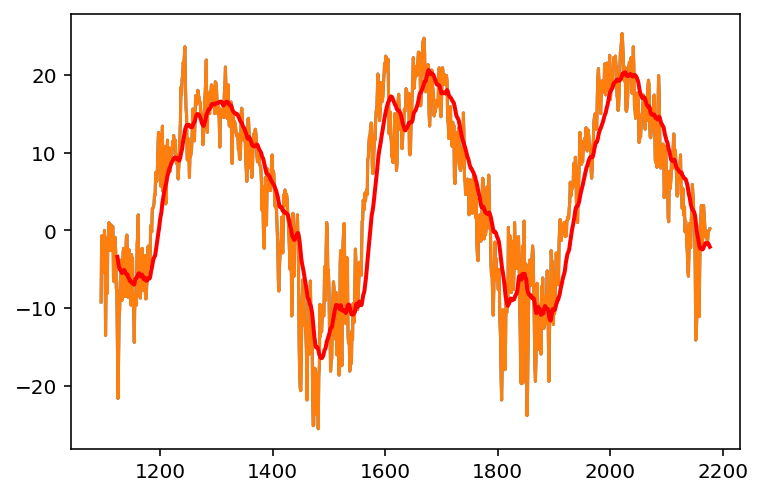

In [69]:
import matplotlib.pyplot as plt
dat = pd.read_html('/Users/Сергей/Температура.html', header=0)
dat = dat[0]
dat.drop(['STATION_ID', 'STATION_NM', 'Q','Q.1','Q.2','Q.3','D'],inplace=True,axis=1)


dat.iloc[365*3:365*6]['TMPMN'].plot()
df = dat.iloc[365*3:365*6]['TMPMN']
df.plot()
df_mean = df.rolling(30).mean()
df_mean.plot(lw=2,color='red')
dat['DATE_OBS'] = pd.to_datetime(dat['DATE_OBS']) 
dat.index=dat['DATE_OBS']
dat.head()


<AxesSubplot:xlabel='DATE_OBS'>

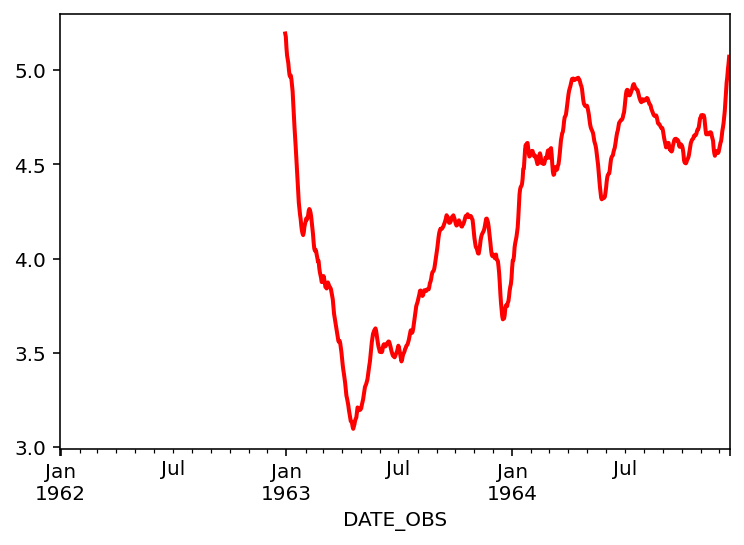

In [58]:
df = dat.iloc[365*3:365*12]['TMPMN']
df_mean = df.rolling(365).mean()
df_mean.plot(lw=2,color='red')

In [59]:
dat['Year']=dat.index.year
dat['Mon']=dat.index.month
dat['Day']=dat.index.day
dates=dat[['Year','Mon','Day']]
dates.head()

,Year,Mon,Day
DATE_OBS,,,
1959-01-01,1959,1,1
1959-01-02,1959,1,2
1959-01-03,1959,1,3
1959-01-04,1959,1,4
1959-01-05,1959,1,5


In [61]:
dat.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)


MultiIndex([(1959,  1,  1),
            (1959,  1,  2),
            (1959,  1,  3),
            (1959,  1,  4),
            (1959,  1,  5),
            (1959,  1,  6),
            (1959,  1,  7),
            (1959,  1,  8),
            (1959,  1,  9),
            (1959,  1, 10),
            ...
            (1964, 12,  9),
            (1964, 12, 10),
            (1964, 12, 11),
            (1964, 12, 12),
            (1964, 12, 13),
            (1964, 12, 14),
            (1964, 12, 15),
            (1964, 12, 16),
            (1964, 12, 17),
            (1964, 12, 18)],
           names=['Year', 'Mon', 'Day'], length=2179)

In [62]:
year_day_mean=dat.groupby(level=[0,1]).mean()
year_day_mean.head()

TMPMAX    TMPMIN      TMPMN    PRECIP    Year  Mon   Day
Year Mon                                                             
1959 1    -1.758065 -6.987097  -4.335484  2.132258  1959.0  1.0  16.0
     2    -2.475000 -8.557143  -5.492857  1.189286  1959.0  2.0  14.5
     3     3.396774 -5.235484  -1.425806  0.996774  1959.0  3.0  16.0
     4    12.050000  1.760000   6.630000  0.796667  1959.0  4.0  15.5
     5    16.129032  6.735484  11.490323  2.232258  1959.0  5.0  16.0

In [64]:
tmpmn=year_day_mean['TMPMN']
tmpmn.head()

Year  Mon
1959  1      -4.335484
      2      -5.492857
      3      -1.425806
      4       6.630000
      5      11.490323
Name: TMPMN, dtype: float64

In [65]:
mon_mean=tmpmn.unstack()
mon_mean.head()

Mon,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1959,-4.335484,-5.492857,-1.425806,6.630000,11.490323,16.886667,20.538710,16.932258,8.253333,2.229032,-5.110000,-10.990323
1960,-9.351613,-7.651724,-5.480645,5.046667,11.625806,18.486667,21.009677,16.190323,9.800000,2.338710,-3.620000,0.167742
1961,-6.174194,-2.335714,0.245161,4.310000,12.058065,19.173333,19.374194,16.825806,9.686667,6.590323,-1.550000,-8.070968
1962,-4.248387,-6.057143,-5.012903,7.590000,13.225806,13.506667,16.361290,14.832258,10.790000,6.451613,1.343333,-7.351613
1963,-15.929032,-10.057143,-9.429032,3.886667,17.022581,13.540000,19.132258,17.796774,13.216667,5.651613,-0.216667,-8.751613


In [66]:
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep','Oct','Nov','Dec']
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.665784,0.770987,0.710337,-0.771052,0.272580,-0.204919,-0.632363,-0.766158,-0.074272,-0.196259,-0.133656
Feb,0.665784,1.000000,0.918142,0.329749,-0.421310,0.269669,-0.134172,-0.112164,-0.723644,-0.040536,-0.086461,-0.463829
Mar,0.770987,0.918142,1.000000,0.279202,-0.674503,0.522893,0.128760,-0.088314,-0.848664,-0.146688,-0.392110,-0.329318
Apr,0.710337,0.329749,0.279202,1.000000,-0.266416,-0.404232,-0.493718,-0.634595,-0.502616,-0.261911,0.075389,-0.338617
May,-0.771052,-0.421310,-0.674503,-0.266416,1.000000,-0.766745,-0.368272,0.456747,0.756777,0.279966,0.598399,-0.373661
Jun,0.272580,0.269669,0.522893,-0.404232,-0.766745,1.000000,0.688182,0.034704,-0.444175,-0.130485,-0.635046,0.508927
Jul,-0.204919,-0.134172,0.128760,-0.493718,-0.368272,0.688182,1.000000,0.532999,-0.312554,-0.614969,-0.889556,0.324333
Aug,-0.632363,-0.112164,-0.088314,-0.634595,0.456747,0.034704,0.532999,1.000000,0.160425,-0.216291,-0.322952,-0.374179
Sep,-0.766158,-0.723644,-0.848664,-0.502616,0.756777,-0.444175,-0.312554,0.160425,1.000000,0.604493,0.646212,0.209998
Oct,-0.074272,-0.040536,-0.146688,-0.261911,0.279966,-0.130485,-0.614969,-0.216291,0.604493,1.000000,0.759817,0.044768


([<matplotlib.axis.YTick at 0x1737cc94190>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

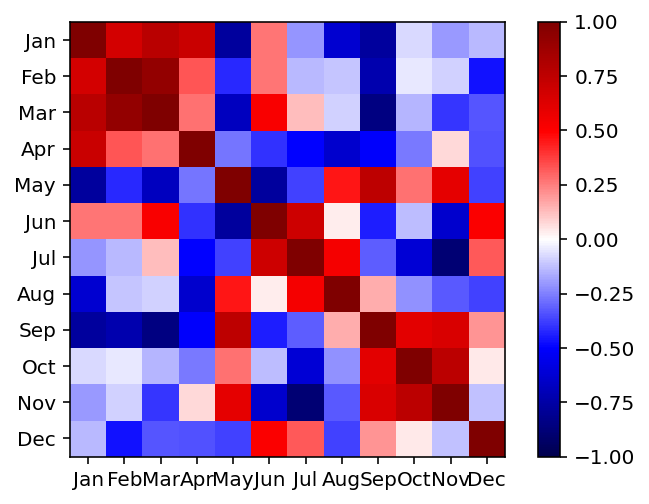

In [72]:
import matplotlib.pyplot as plt

plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1), plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)